In [2]:
library(dplyr)
library(ggplot2)
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
vancouver_crime_data <- read.csv("crimedata_csv_AllNeighbourhoods_AllYears.csv")
head(vancouver_crime_data)
cat("Number of Crimes: ", nrow(vancouver_crime_data))

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Other Theft,2019,3,14,10,34,47XX OAK ST,South Cambie,490706.9,5454474
2,Other Theft,2005,8,1,0,0,47XX OAK ST,South Cambie,490706.9,5454474
3,Other Theft,2012,12,6,9,30,47XX OAK ST,South Cambie,490706.9,5454474
4,Other Theft,2004,1,25,17,0,47XX OAK ST,South Cambie,490710.6,5454535
5,Other Theft,2020,9,22,11,36,47XX OSLER ST,Shaughnessy,490528.5,5454450
6,Other Theft,2003,8,18,7,30,47XX OSLER ST,Shaughnessy,490529.8,5454502


Number of Crimes:  853296

In [4]:
vancouver_thefts <- vancouver_crime_data %>%
    filter(TYPE == "Other Theft" | TYPE == "Theft from Vehicle" | TYPE == "Theft of Vehicle" | TYPE == "Theft of Bicycle") %>%
    mutate(DAY_NIGHT = ifelse(HOUR >= 6 & HOUR < 18, "DAY", "NIGHT")) %>%
    select(TYPE, YEAR, HOUR, DAY_NIGHT, NEIGHBOURHOOD)
head(vancouver_thefts)

theft_counts <- vancouver_thefts %>%
    group_by(TYPE) %>%
    summarise(COUNT = n())
theft_counts

,TYPE,YEAR,HOUR,DAY_NIGHT,NEIGHBOURHOOD
,<chr>,<int>,<int>,<chr>,<chr>
1,Other Theft,2019,10,DAY,South Cambie
2,Other Theft,2005,0,NIGHT,South Cambie
3,Other Theft,2012,9,DAY,South Cambie
4,Other Theft,2004,17,DAY,South Cambie
5,Other Theft,2020,11,DAY,Shaughnessy
6,Other Theft,2003,7,DAY,Shaughnessy


TYPE,COUNT
<chr>,<int>
Other Theft,210540
Theft from Vehicle,237891
Theft of Bicycle,36403
Theft of Vehicle,44404


`summarise()` has grouped output by 'TYPE'. You can override using the
`.groups` argument.


TYPE,DAY_NIGHT,COUNT,PROP
<chr>,<chr>,<int>,<dbl>
Other Theft,DAY,132566,0.6296476
Other Theft,NIGHT,77974,0.3703524
Theft from Vehicle,DAY,102276,0.4299280
Theft from Vehicle,NIGHT,135615,0.5700720
Theft of Bicycle,DAY,19634,0.5393512
Theft of Bicycle,NIGHT,16769,0.4606488
Theft of Vehicle,DAY,17364,0.3910459
Theft of Vehicle,NIGHT,27040,0.6089541


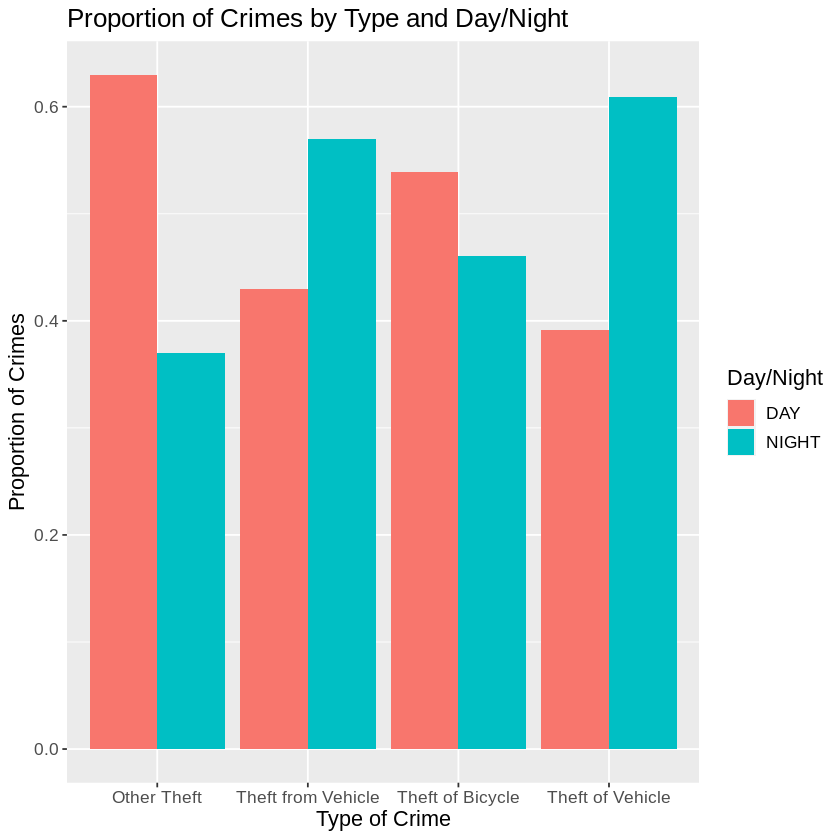

In [6]:
theft_counts_by_type <- vancouver_thefts %>%
  group_by(TYPE, DAY_NIGHT) %>%
  summarise(COUNT = n()) %>%
  mutate(PROP = COUNT / sum(COUNT))
theft_counts_by_type

theft_counts_by_type_plot <- theft_counts_by_type |>
  ggplot(aes(x=TYPE, y=PROP, fill=DAY_NIGHT)) +
  geom_bar(stat="identity", position="dodge") +
  labs(x="Type of Crime", y="Proportion of Crimes", fill="Day/Night") +
  ggtitle("Proportion of Crimes by Type and Day/Night") +
  theme(text = element_text(size=13)) 
theft_counts_by_type_plot

HOUR,COUNT
<int>,<int>
0,120522
1,21029
2,16726
3,14227
4,12763
5,12129
6,12865
7,17271
8,25721


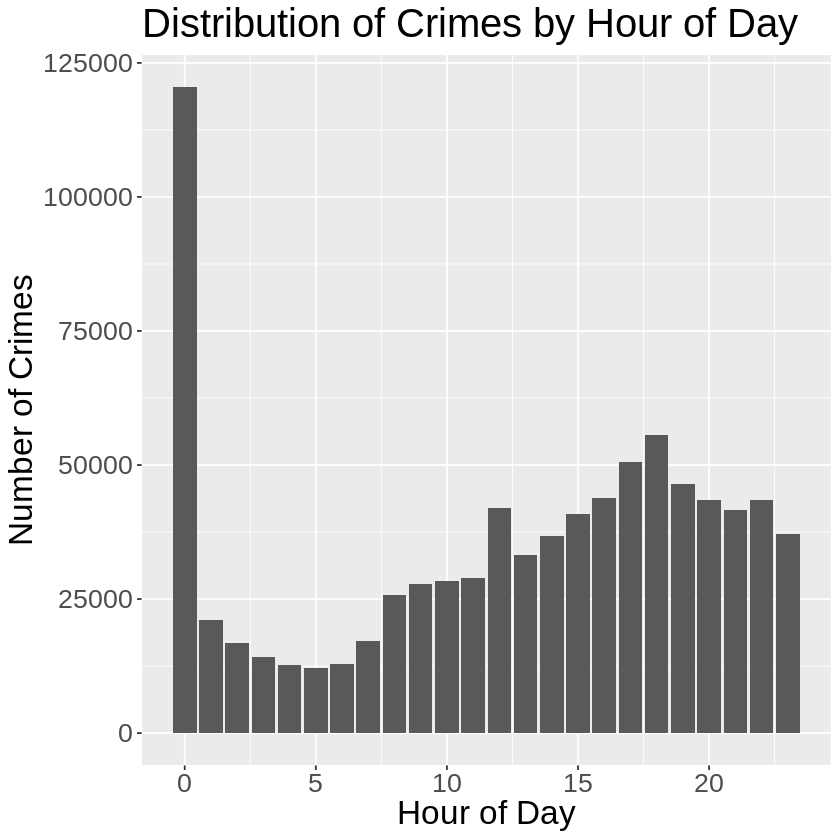

In [12]:

theft_counts_hour <- vancouver_crime_data %>%
  group_by(HOUR) %>%
  summarise(COUNT = n())
theft_counts_hour

theft_counts_hour_plot <- ggplot(theft_counts_hour, aes(x=HOUR, y=COUNT)) +
  geom_bar(stat="identity") +
  labs(x="Hour of Day", y="Number of Crimes") +
  ggtitle("Distribution of Crimes by Hour of Day") +
  theme(text = element_text(size=20))
  
theft_counts_hour_plot

DAY_NIGHT,COUNT,PROP
<chr>,<int>,<dbl>
DAY,388337,0.4551023
NIGHT,464959,0.5448977


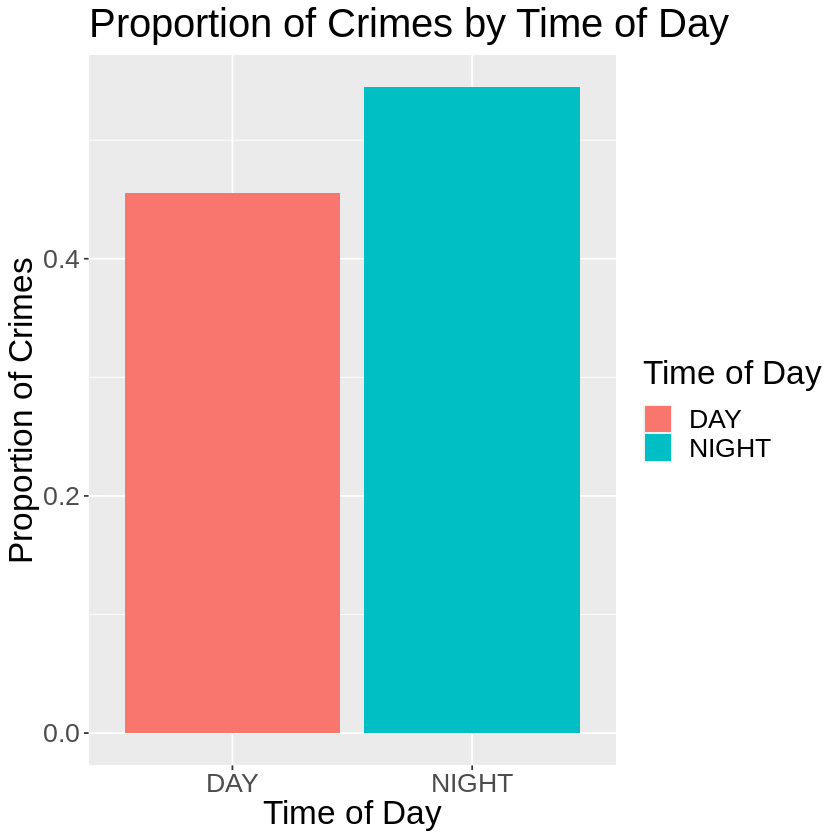

In [14]:
theft_counts_by_day_night <- vancouver_crime_data %>%
  mutate(DAY_NIGHT = ifelse(HOUR >= 6 & HOUR < 18, "DAY", "NIGHT")) %>%
  group_by(DAY_NIGHT) %>%
  summarise(COUNT = n()) %>%
  mutate(PROP = COUNT / sum(COUNT))
theft_counts_by_day_night

theft_counts_by_day_night_plot <- 
  ggplot(theft_counts_by_day_night, aes(x=DAY_NIGHT, y=PROP, fill=DAY_NIGHT)) +
  geom_bar(stat="identity") +
  labs(x = "Time of Day", y= "Proportion of Crimes", fill="Time of Day") +
  ggtitle("Proportion of Crimes by Time of Day") +
  theme(text = element_text(size=20))
theft_counts_by_day_night_plot

In [31]:
sample1 <- vancouver_thefts |>
  rep_sample_n(size = 100, reps = 1, replace = FALSE) 

head(sample1)

replicate,TYPE,YEAR,HOUR,DAY_NIGHT,NEIGHBOURHOOD
<int>,<chr>,<int>,<int>,<chr>,<chr>
1,Theft from Vehicle,2012,9,DAY,West End
1,Other Theft,2012,1,NIGHT,West End
1,Theft of Bicycle,2017,12,DAY,Fairview
1,Theft from Vehicle,2011,15,DAY,Central Business District
1,Theft of Bicycle,2015,19,NIGHT,Kensington-Cedar Cottage
1,Theft from Vehicle,2016,14,DAY,Dunbar-Southlands


HOUR,COUNT
<int>,<int>
0,4
1,2
2,2
3,1
4,1
5,2
6,1
7,2
8,1


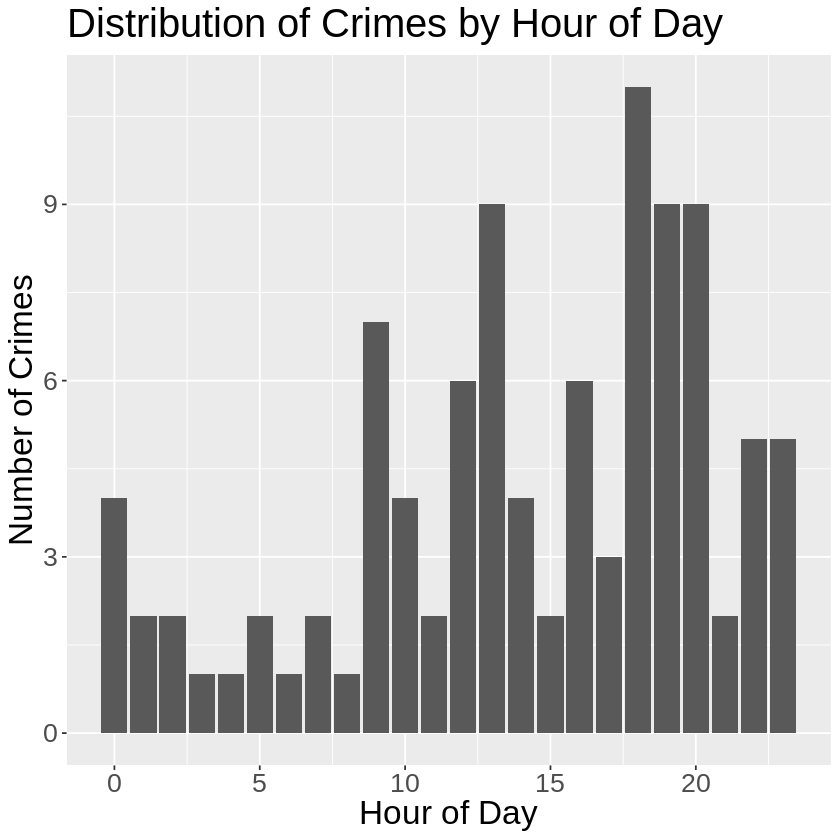

In [32]:
sample1_counts_hour <- sample1 %>%
  group_by(HOUR) %>%
  summarise(COUNT = n())
sample1_counts_hour

sample1_dist_plot <- ggplot(sample1_counts_hour, aes(x=HOUR, y=COUNT)) +
  geom_bar(stat="identity") +
  labs(x="Hour of Day", y="Number of Crimes") +
  ggtitle("Distribution of Crimes by Hour of Day") +
  theme(text = element_text(size=20))
sample1_dist_plot

DAY_NIGHT,COUNT,PROP
<chr>,<int>,<dbl>
DAY,47,0.47
NIGHT,53,0.53


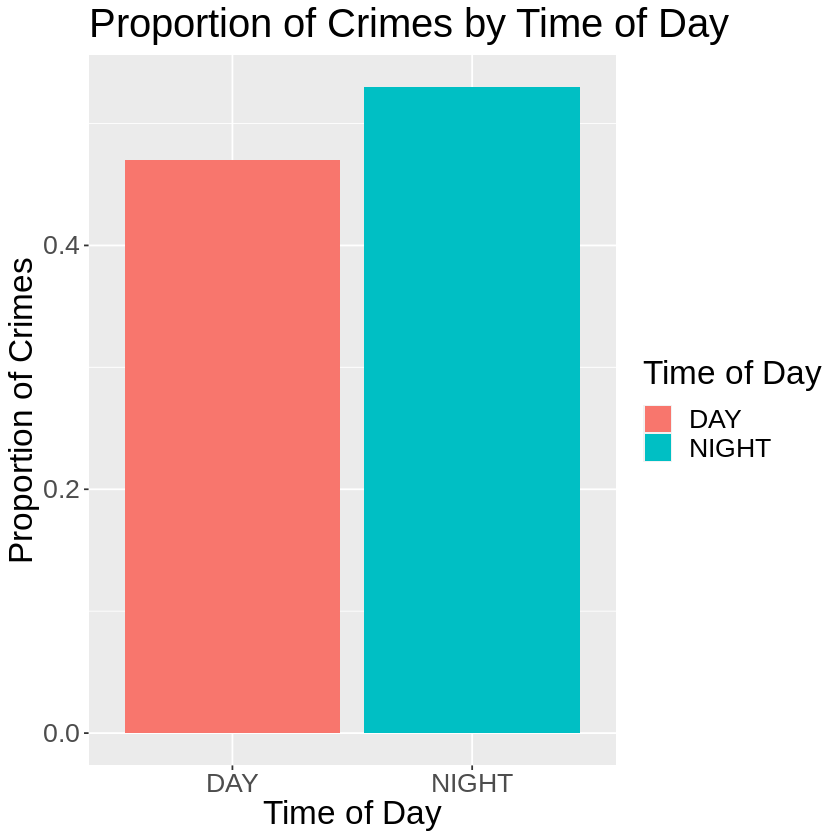

In [33]:
sample1_counts_by_day_night <- sample1 %>%
  mutate(DAY_NIGHT = ifelse(HOUR >= 6 & HOUR < 18, "DAY", "NIGHT")) %>%
  group_by(DAY_NIGHT) %>%
  summarise(COUNT = n()) %>%
  mutate(PROP = COUNT / sum(COUNT))
sample1_counts_by_day_night

sample1_counts_by_day_night_plot <- 
  ggplot(sample1_counts_by_day_night, aes(x=DAY_NIGHT, y=PROP, fill=DAY_NIGHT)) +
  geom_bar(stat="identity") +
  labs(x = "Time of Day", y= "Proportion of Crimes", fill="Time of Day") +
  ggtitle("Proportion of Crimes by Time of Day") +
  theme(text = element_text(size=20))
sample1_counts_by_day_night_plot

In [36]:
sample1_bootstarp <- sample1 |>
  rep_sample_n(size=100, reps=2000, replace=TRUE)

head(sample1_bootstarp)


replicate,TYPE,YEAR,HOUR,DAY_NIGHT,NEIGHBOURHOOD
<int>,<chr>,<int>,<int>,<chr>,<chr>
1,Other Theft,2003,9,DAY,Grandview-Woodland
1,Theft from Vehicle,2015,6,DAY,Fairview
1,Theft from Vehicle,2009,10,DAY,Central Business District
1,Other Theft,2017,16,DAY,Central Business District
1,Theft from Vehicle,2016,0,NIGHT,Fairview
1,Theft from Vehicle,2003,23,NIGHT,Central Business District


HOUR,COUNT
<int>,<int>
0,7854
1,4044
2,4015
3,1895
4,2027
5,3910
6,2054
7,4040
8,1975


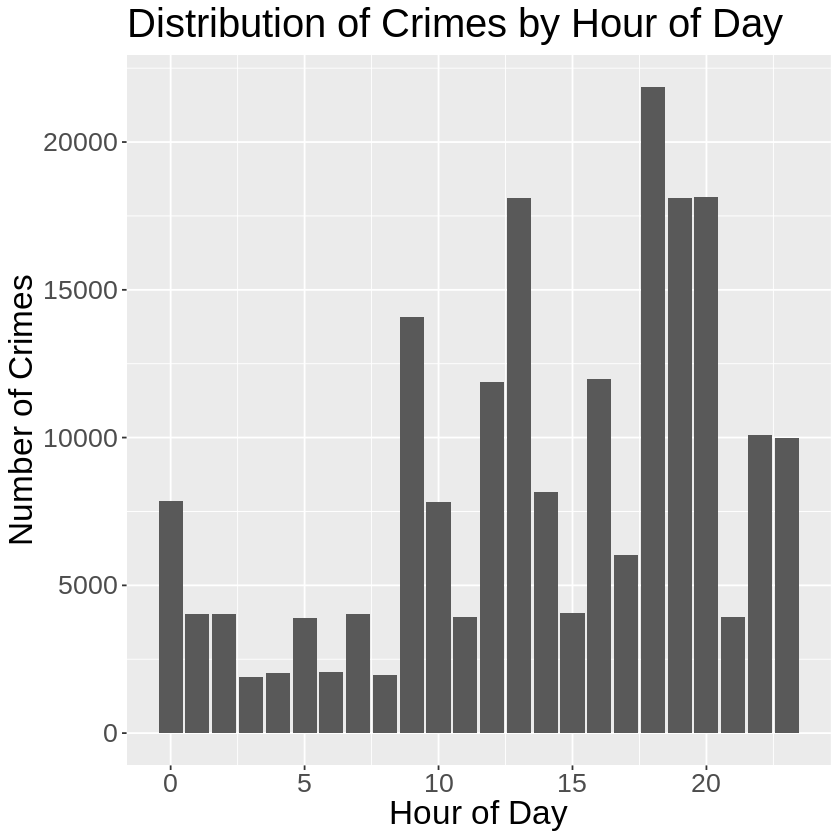

In [37]:
sample1_bs_counts_hour <- sample1_bootstarp %>%
  group_by(HOUR) %>%
  summarise(COUNT = n())
sample1_bs_counts_hour

sample1_bs_counts_hour_plot <- ggplot(sample1_bs_counts_hour, aes(x=HOUR, y=COUNT)) +
  geom_bar(stat="identity") +
  labs(x="Hour of Day", y="Number of Crimes") +
  ggtitle("Distribution of Crimes by Hour of Day") +
  theme(text = element_text(size=20))
sample1_bs_counts_hour_plot

DAY_NIGHT,COUNT,PROP
<chr>,<int>,<dbl>
DAY,94141,0.470705
NIGHT,105859,0.529295


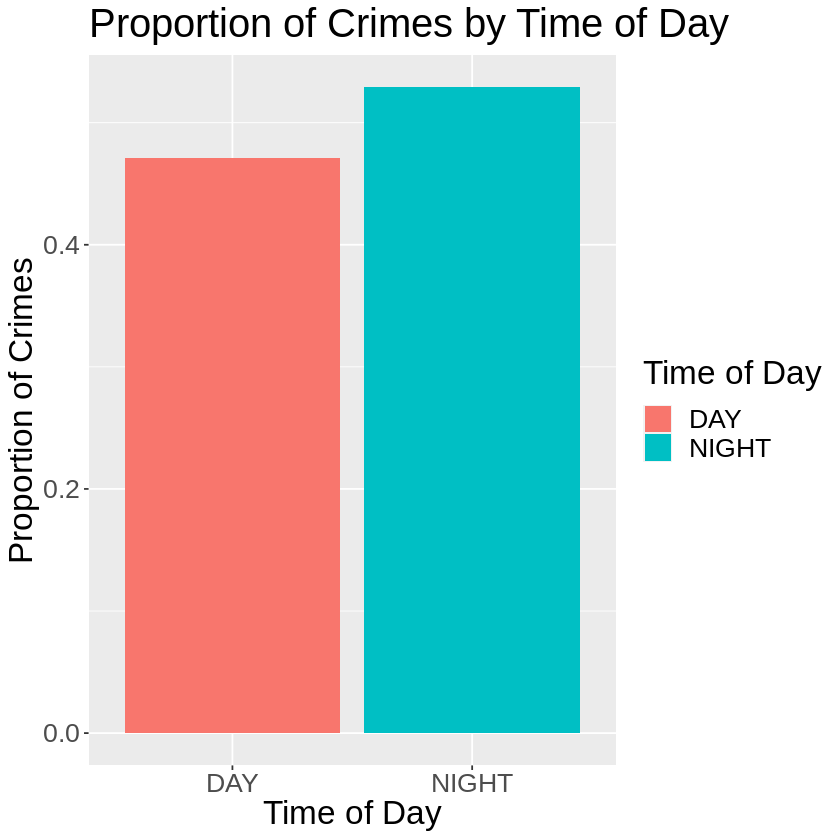

In [39]:
sample1_bs_counts_by_day_night <- sample1_bootstarp %>%
  mutate(DAY_NIGHT = ifelse(HOUR >= 6 & HOUR < 18, "DAY", "NIGHT")) %>%
  group_by(DAY_NIGHT) %>%
  summarise(COUNT = n()) %>%
  mutate(PROP = COUNT / sum(COUNT))
sample1_bs_counts_by_day_night

sample1_bs_counts_by_day_night_plot <- 
  ggplot(sample1_bs_counts_by_day_night, aes(x=DAY_NIGHT, y=PROP, fill=DAY_NIGHT)) +
  geom_bar(stat="identity") +
  labs(x = "Time of Day", y= "Proportion of Crimes", fill="Time of Day") +
  ggtitle("Proportion of Crimes by Time of Day") +
  theme(text = element_text(size=20))
sample1_bs_counts_by_day_night_plot